

Lego is a household name across the world, supported by a diverse toy line, hit movies, and a series of successful video games. In this project, we are going to explore a key development in the history of Lego: the introduction of licensed sets such as Star Wars, Super Heroes, and Harry Potter.

The introduction of its first licensed series, Star Wars, was a hit that sparked a series of collaborations with more themed sets. The partnerships team has asked you to perform an analysis of this success, and before diving into the analysis, they have suggested reading the descriptions of the two datasets to use, reported below.

## The Data

You have been provided with two datasets to use. A summary and preview are provided below.

## lego_sets.csv

| Column     | Description              |
|------------|--------------------------|
| `"set_num"` | A code that is unique to each set in the dataset. This column is critical, and a missing value indicates the set is a duplicate or invalid! |
| `"name"` | The name of the set. |
| `"year"` | The date the set was released. |
| `"num_parts"` | The number of parts contained in the set. This column is not central to our analyses, so missing values are acceptable. |
| `"theme_name"` | The name of the sub-theme of the set. |
| `"parent_theme"` | The name of the parent theme the set belongs to. Matches the name column of the parent_themes csv file.
|

## parent_themes.csv

| Column     | Description              |
|------------|--------------------------|
| `"id"` | A code that is unique to every theme. |
| `"name"` | The name of the parent theme. |
| `"is_licensed"` | A Boolean column specifying whether the theme is a licensed theme. |

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

lego = pd.read_csv('data/lego_sets.csv')
themes = pd.read_csv('data/parent_themes.csv')

lego_copia = lego.copy()
themes_copia = themes.copy()

Matplotlib is building the font cache; this may take a moment.


In [2]:
lego_copia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11986 entries, 0 to 11985
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   set_num       11833 non-null  object 
 1   name          11833 non-null  object 
 2   year          11986 non-null  int64  
 3   num_parts     6926 non-null   float64
 4   theme_name    11833 non-null  object 
 5   parent_theme  11986 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 374.6+ KB


In [3]:
themes_copia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111 entries, 0 to 110
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           111 non-null    int64 
 1   name         111 non-null    object
 2   is_licensed  111 non-null    bool  
dtypes: bool(1), int64(1), object(1)
memory usage: 1.5+ KB


# Calidad de datos

## ¿Qué columnas tienen valores faltantes? ¿En qué proporción?

Columna: set_num | Faltantes: 153
Columna: name | Faltantes: 153
Columna: year | Faltantes: 0
Columna: num_parts | Faltantes: 5060
Columna: theme_name | Faltantes: 153
Columna: parent_theme | Faltantes: 0


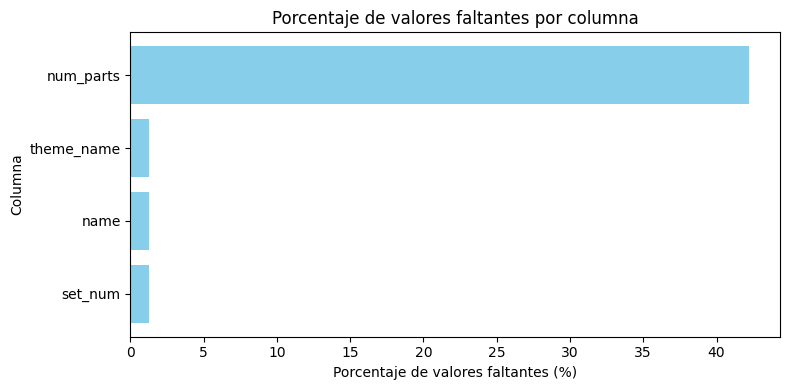

In [4]:
#cantidad de faltantes por columna
col_fal = lego_copia.isna().sum()

#porcentaje de faltantes
col_fal_prop = (lego_copia.isna().mean() * 100).round(2)

#nuevo df de faltantes
df_faltantes = pd.DataFrame({'Cantidad': col_fal, 'Proporción': col_fal_prop})


# recorremos el df y mostramos ordenado
for nombre, faltantes, porcentaje in df_faltantes.itertuples():
    print(f"Columna: {nombre} | Faltantes: {faltantes}")



#filtramos que no sean 0
df_faltantes_filtrado = df_faltantes[df_faltantes['Cantidad'] > 0]
#ordenamos
df_faltantes_filtrado = df_faltantes_filtrado.sort_values(by='Cantidad', ascending=True)

plt.figure(figsize=(8, 4))
plt.barh(df_faltantes_filtrado.index, df_faltantes_filtrado['Proporción'], color='skyblue')
plt.xlabel('Porcentaje de valores faltantes (%)')
plt.ylabel('Columna')
plt.title('Porcentaje de valores faltantes por columna')
plt.tight_layout()
plt.show()


La columna **`num_parts`** presenta un alto porcentaje de valores faltantes (40%), lo que implica que no todos los sets tienen registrada la cantidad de piezas.

## ¿Cantidad de duplicados en set_num?

In [5]:
duplicados = lego_copia[lego_copia['set_num'].duplicated()]

print("Cantidad de duplicados en 'set_num':", duplicados.shape[0])


# subset=columna de duplicados, keep = cual conservar
lego_copia =  lego_copia.drop_duplicates(subset="set_num", keep="first")



Cantidad de duplicados en 'set_num': 152


El campo **`set_num`** presenta 152 registros duplicados. Que fueron eliminados en la limpieza.

## ¿num_parts tiene valores atipicos o ceros raros?

Cantidad de sets con 0 piezas: 268
count    6836.000000
mean      162.176126
std       332.783146
min        -1.000000
25%        10.000000
50%        45.000000
75%       170.000000
max      5922.000000
Name: num_parts, dtype: float64
Cantidad de outliers detectados: 767


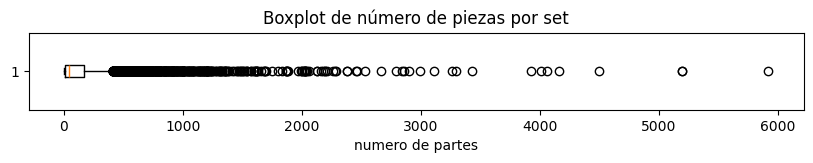

In [6]:

ceros = (lego_copia['num_parts'] == 0).sum()
print(f"Cantidad de sets con 0 piezas: {ceros}")

# Calcular media y mediana para ver la simetría,
"""
media = lego['num_parts'].mean()
mediana = lego['num_parts'].median()
print(f"Media: {media:.2f}, Mediana: {mediana:.2f}")

if abs(media - mediana) < 0.05 * mediana:
    print("Distribución aproximadamente simétrica → z-score podría funcionar.")
elif media > mediana:
    print("Distribución asimétrica positiva (cola a la derecha) → mejor usar IQR ")
else:
    print("Distribución asimétrica negativa (cola a la izquierda) → mejor usar IQR")

"""
#calculamos las estadisticas
print(lego_copia['num_parts'].describe())


#se encontraron valores negativos que no deberian estar, se cambian a nan
lego_copia['num_parts'] = lego_copia['num_parts'].replace(-1, np.nan)


#sacamos los faltantes, en una versión limpia para análisis
num_parts_limpio = lego_copia['num_parts'].dropna().astype(float)



# Detectar outliers con IQR usando la columna limpia
Q1 = num_parts_limpio.quantile(0.25)
Q3 = num_parts_limpio.quantile(0.75)
IQR = Q3 - Q1

lim_inf = Q1 - 1.5 * IQR
lim_sup = Q3 + 1.5 * IQR

outliers = num_parts_limpio[(num_parts_limpio < lim_inf) | (num_parts_limpio > lim_sup)]
print(f"Cantidad de outliers detectados: {len(outliers)}")

# Visualización con boxplot
plt.figure(figsize=(10, 1))
plt.boxplot(num_parts_limpio , vert=False, showfliers=True)
plt.title('Boxplot de número de piezas por set')
plt.xlabel('numero de partes')
plt.show()


 Se identificaron **271 sets con 0 piezas**.

 La comparación entre media y mediana muestra que la distribución de **`num_parts`** está sesgada hacia la derecha: la mayoría de los sets tienen pocas piezas, pero existen algunos muy grandes.

# Volumen de sets por año

## ¿Cual es el año con mas y con menos sets?

In [7]:

#sets por año
sets_por_año = lego_copia.groupby('year').size()



# Año con más sets
año_max = sets_por_año.idxmax() #busca el indice(año) con mayor valor
max_sets = sets_por_año.max()

# Año con menos sets
año_min = sets_por_año.idxmin() #busca el indice(año) con menor valor
min_sets = sets_por_año.min()

print(f"Año con más sets: {año_max} ({max_sets} sets)")
print(f"Año con menos sets: {año_min} ({min_sets} sets)")




Año con más sets: 2014 (715 sets)
Año con menos sets: 1960 (3 sets)


Conclusión:
- El año con más sets fue 2014 , con 732 sets lanzados.
- El año con menos sets fue 1960, con solo 3 sets registrados.

Esto muestra la amplitud de crecimiento de LEGO en el tiempo.

## ¿Cómo creció la cantidad de sets con el tiempo?

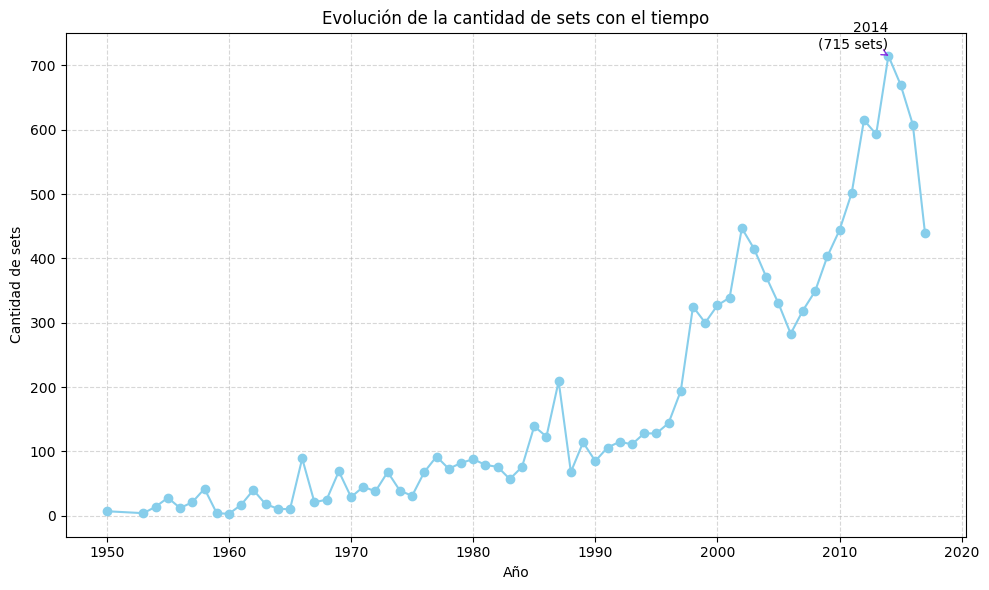

In [8]:
plt.figure(figsize=(10,6))
sets_por_año.plot(kind='line', marker='o', color='skyblue')


# Primer año
plt.annotate(f'{año_max}\n({sets_por_año.loc[año_max]} sets)',
             xy=(año_max, sets_por_año.loc[año_max]),
             xytext=(año_max, sets_por_año.max()+12),
             ha='right',
             arrowprops=dict(arrowstyle='->', color='blueviolet'),)

plt.title('Evolución de la cantidad de sets con el tiempo')
plt.xlabel('Año')
plt.ylabel('Cantidad de sets')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Conclusión:
- Se observa un crecimiento sostenido en el número de sets lanzados, especialmente a partir de la década de 1990.

El pico en 2014 refleja el momento de mayor expansión en la historia registrada de LEGO.

## ¿Cuál fue el primer y el más reciente año con sets?

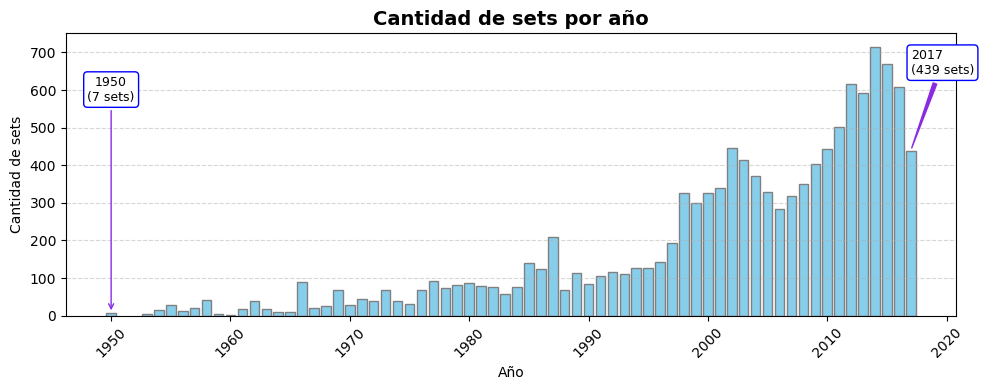

In [9]:


primer_año = sets_por_año.index.min()
ultimo_año = sets_por_año.index.max()

plt.figure(figsize=(10,4))
bars = plt.bar(sets_por_año.index, sets_por_año.values, color='skyblue', edgecolor='gray')

# Primer año
plt.annotate(f'{primer_año}\n({sets_por_año.loc[primer_año]} sets)',
             xy=(primer_año, sets_por_año.loc[primer_año]),
             xytext=(primer_año, sets_por_año.max()*0.8),
             ha='center',
             arrowprops=dict(arrowstyle='->', color='blueviolet'),
             fontsize=9,
             bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="blue", lw=1)
             )

# Ultimo año
plt.annotate(f'{ultimo_año}\n({sets_por_año.loc[ultimo_año]} sets)',
             xy=(ultimo_año, sets_por_año.loc[ultimo_año]),
             xytext=(ultimo_año, sets_por_año.max()*0.9),
             ha='left',
             arrowprops=dict(arrowstyle='wedge', color='blueviolet'),
             fontsize=9,
             bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="blue", lw=1)
             )

# Estética uniforme
plt.title('Cantidad de sets por año', fontsize=14, fontweight='bold')
plt.xlabel('Año')
plt.ylabel('Cantidad de sets')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

El primer set se lanzó en 1950 y el más reciente en 2017.

# Piezas por set

## ¿Cuál es el set con más piezas? ¿Top 10?

In [10]:
#obtemenos el nombre, año y piezas del que tiene mas piezas
set_max_piezas = lego_copia.loc[lego_copia["num_parts"].idxmax(), ["name", "year", "num_parts"]]
print(f"Set con más piezas: {set_max_piezas}")


Set con más piezas: name         Taj Mahal
year              2008
num_parts       5922.0
Name: 170, dtype: object


In [11]:

#seleccionamos nombre, año y partes de los 10 con mas piezas
top10_piezas = lego_copia.nlargest(10, "num_parts")[["name", "year", "num_parts"]]

#display muestra en formato tabular en vez de plano
display(top10_piezas)

,name,year,num_parts
170,Taj Mahal,2008,5922.0
1371,Window Exploration Bag,2010,5200.0
161,Millennium Falcon - UCS,2007,5195.0
3225,Personalised Mosaic Portrait,2016,4501.0
234,Big Ben,2016,4166.0
7723,The Disney Castle,2016,4060.0
236,Assembly Square,2017,4009.0
3891,Bucket Wheel Excavator,2016,3928.0
162,Eiffel Tower 1:300 Scale,2007,3428.0
8199,Sandcrawler,2014,3294.0


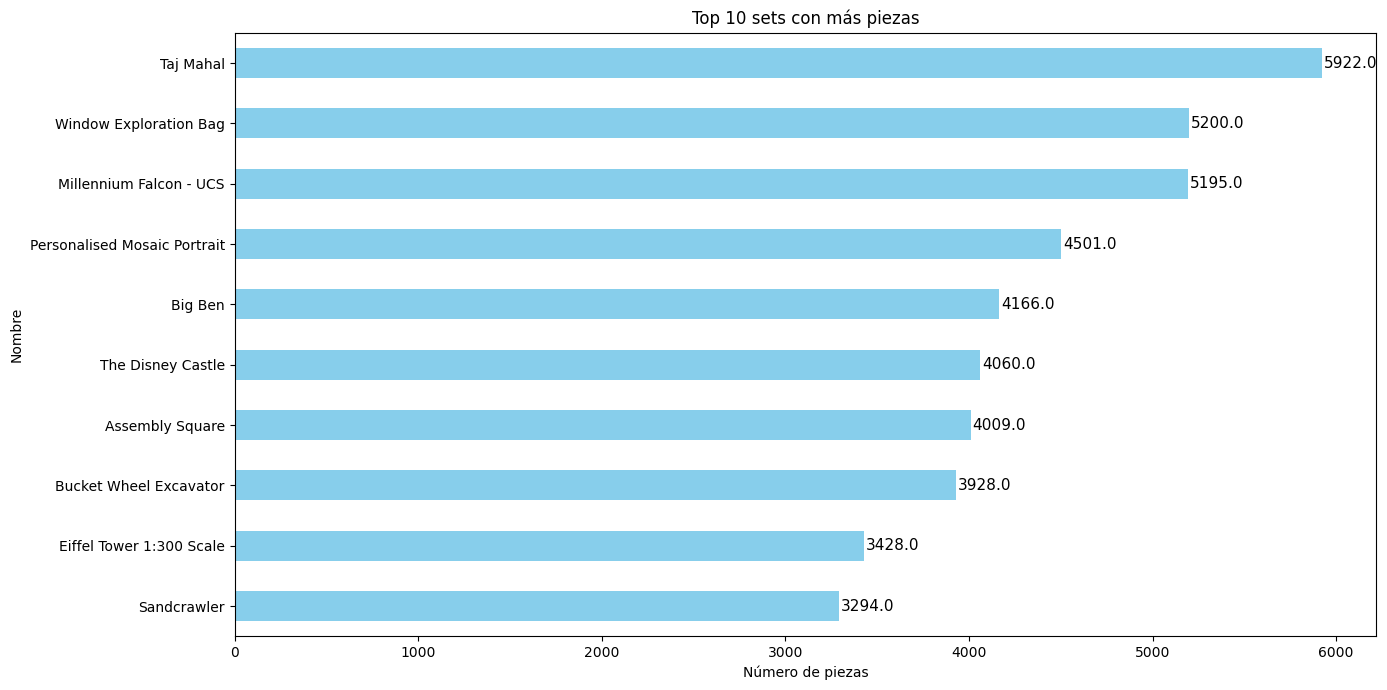

In [12]:
ax = top10_piezas.sort_values("num_parts").plot(
kind="barh", x="name", y="num_parts", figsize=(14,7), legend=False, color="skyblue"
) 

for i, valor in enumerate(top10_piezas.sort_values("num_parts")["num_parts"]):
    ax.text(valor + 10, 
    i, 
    str(valor), 
    va='center',
    fontsize=11)



plt.title("Top 10 sets con más piezas")
plt.xlabel("Número de piezas")
plt.ylabel("Nombre")
plt.tight_layout()
plt.show()

El set con más piezas es el Taj Mahal, lanzado en 2008 con 5922 piezas.

## ¿Cómo es la distribución de num_parts?

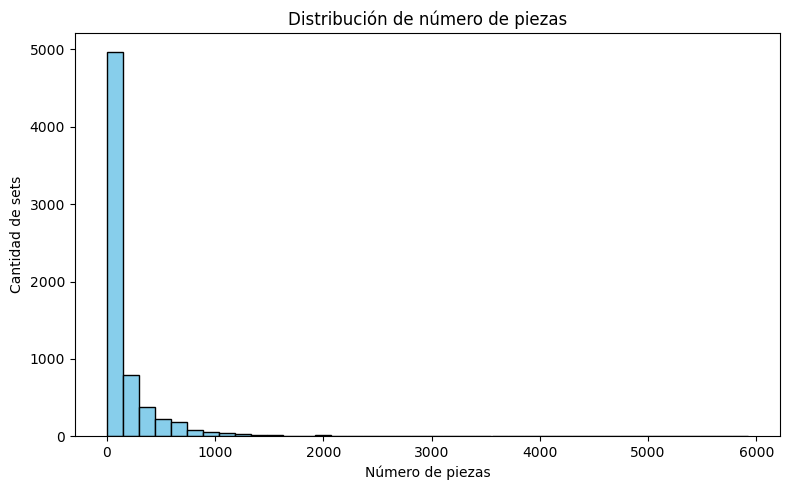

Distribución de num_parts:count    6833.000000
mean      162.247768
std       332.838631
min         0.000000
25%        10.000000
50%        45.000000
75%       170.000000
max      5922.000000
Name: num_parts, dtype: float64


In [13]:


fig, ax = plt.subplots(figsize=(8,5))

# Histograma en el eje ax
ax.hist(
   lego_copia['num_parts'],
    bins=40,
    color='skyblue',
    edgecolor='black'
)

# Personalización usando métodos de ax
ax.set_title('Distribución de número de piezas')
ax.set_xlabel('Número de piezas')
ax.set_ylabel('Cantidad de sets')

fig.tight_layout()
plt.show()



print(f"Distribución de num_parts:{lego_copia['num_parts'].describe()}" )


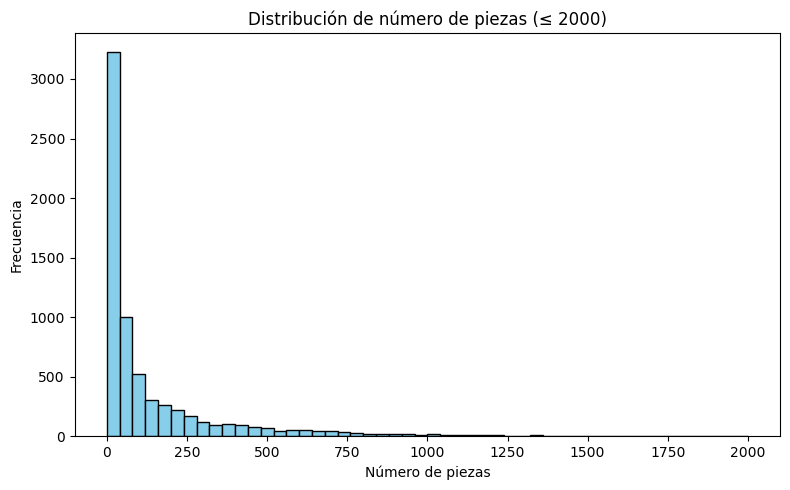

In [14]:


fig, ax = plt.subplots(figsize=(8,5))

ax.hist(
    lego_copia[lego_copia['num_parts'] <= 2000]['num_parts'], 
    bins=50, 
    color='skyblue', 
    edgecolor='black'
    
)

ax.set_title('Distribución de número de piezas (≤ 2000)')
ax.set_xlabel('Número de piezas')
ax.set_ylabel('Frecuencia')
fig.tight_layout()
plt.show()


La mayoría de los sets tienen pocas piezas, pero existen outliers con miles de piezas que sesgan la media hacia arriba hasta 163.85

## ¿Cambió el tamaño promedio de los sets a lo largo de los años?

year
1950     8.666667
1953     1.000000
1954    17.428571
1955    45.166667
1956    11.888889
Name: num_parts, dtype: float64
Año con mayor promedio: 2017 (310 piezas)
Año con menor promedio: 1953 (1 piezas)


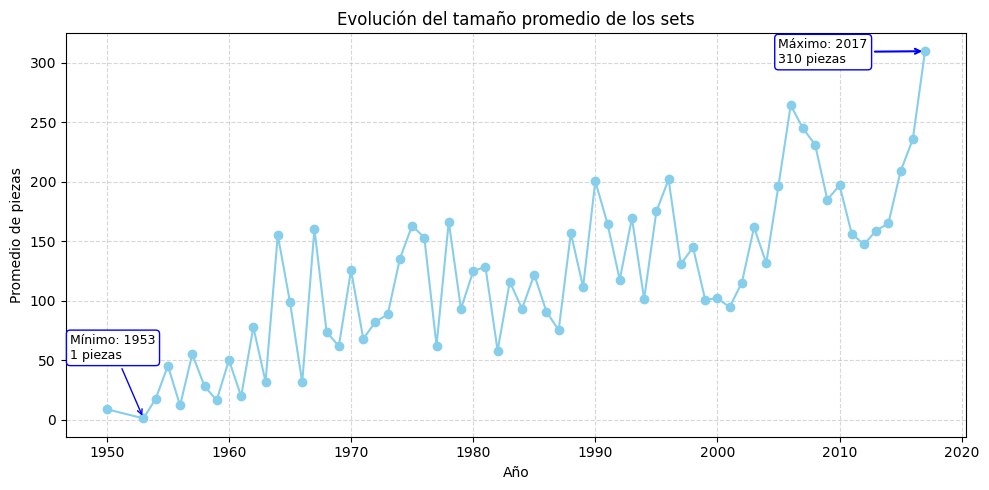

In [15]:
# Promedio de piezas por año
promedio_por_año = lego_copia.groupby('year')['num_parts'].mean()

print(promedio_por_año.head())  # primeras filas para verificar

max_year = promedio_por_año.idxmax()
max_value = promedio_por_año.max()

min_year = promedio_por_año.idxmin()
min_value = promedio_por_año.min()

print(f"Año con mayor promedio: {max_year} ({max_value:.0f} piezas)")
print(f"Año con menor promedio: {min_year} ({min_value:.0f} piezas)")

# Crear figura y ejes
fig, ax = plt.subplots(figsize=(10,5))

# Línea principal
ax.plot(promedio_por_año.index, promedio_por_año.values, marker='o', color='skyblue')

# Anotación máximo
ax.annotate(
    f'Máximo: {max_year}\n{max_value:.0f} piezas',
    xy=(max_year, max_value),
    xytext=(max_year-12, max_value-10),
    arrowprops=dict(arrowstyle='->', color='blue', lw=1.5),
    fontsize=9,
    bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="blue", lw=1)
)

# Anotación mínimo
ax.annotate(
    f'Mínimo: {min_year}\n{min_value:.0f} piezas',
    xy=(min_year, min_value),
    xytext=(min_year-6, min_value+50),
    arrowprops=dict(arrowstyle='->', color='blue'),
    fontsize=9,
    bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="blue", lw=1)
)

# Personalización con métodos de ax
ax.set_title('Evolución del tamaño promedio de los sets')
ax.set_xlabel('Año')
ax.set_ylabel('Promedio de piezas')
ax.grid(True, linestyle='--', alpha=0.5)

fig.tight_layout()
plt.show()

El tamaño promedio de los sets ha aumentado con el tiempo, reflejando una tendencia hacia sets más complejos.

# Análisis de Star Wars en LEGO

## ¿Qué porcentaje del catálogo total de LEGO representa Star Wars?

Total de sets LEGO: 11833
Total de sets Star Wars: 609
Porcentaje Star Wars: 5.15%


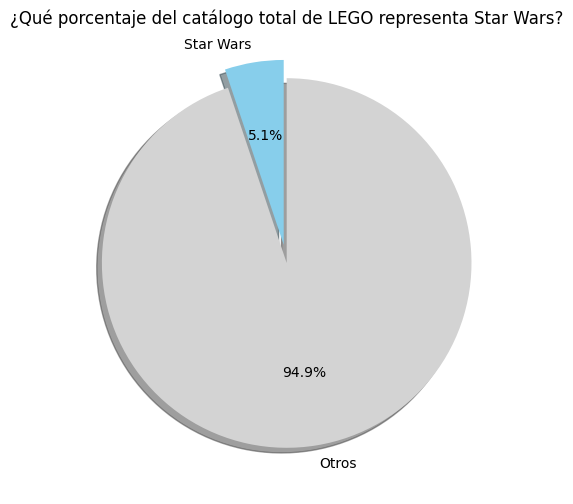

In [16]:

# Filtrar sets de Star Wars
sw = lego_copia[lego_copia["parent_theme"] == "Star Wars"]

# Calcular totales
total_sets = lego_copia["set_num"].nunique()
total_sw = sw["set_num"].nunique()
porcentaje_sw = total_sw / total_sets * 100

print(f"Total de sets LEGO: {total_sets}")
print(f"Total de sets Star Wars: {total_sw}")
print(f"Porcentaje Star Wars: {porcentaje_sw:.2f}%")



fig, ax = plt.subplots(figsize=(6,6))

# Gráfico de pastel en el eje ax
ax.pie(
    [total_sw, total_sets - total_sw],
    labels=["Star Wars", "Otros"],
    autopct="%1.1f%%",
    startangle=90,
    colors=["skyblue", "lightgray"],
    explode=(0.1, 0),
    shadow=True
)

# Título con método de ax
ax.set_title("¿Qué porcentaje del catálogo total de LEGO representa Star Wars?")

plt.show()


Representa el 5.1% del catálogo total de LEGO

## ¿Cómo ha evolucionado Star Wars a lo largo de los años?

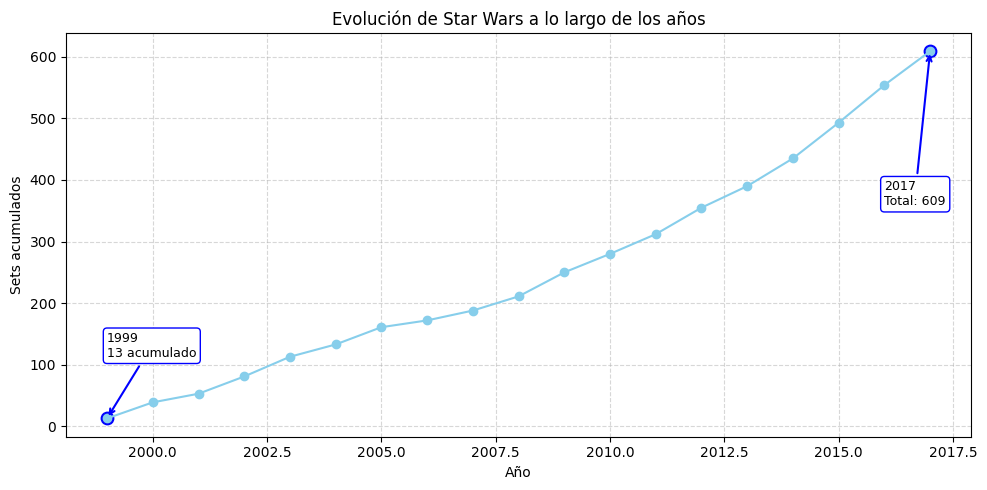

In [17]:

# Filtrar solo sets de Star Wars
sw_sets = lego_copia[lego_copia['parent_theme'] == "Star Wars"]

# Contar sets por año 
sw_por_año = sw_sets.groupby('year')['set_num'].count()

#alcular acumulado
sw_acum = sw_por_año.cumsum()

# Primer y último año
primer_anio = sw_acum.index.min()
ultimo_anio = sw_acum.index.max()
total_sw = sw_acum.loc[ultimo_anio]

# Crear figura y ejes
fig, ax = plt.subplots(figsize=(10,5))

# Línea principal
ax.plot(sw_acum.index, sw_acum.values, marker='o', color='skyblue')

# Primer año
ax.scatter(primer_anio, sw_acum.loc[primer_anio], s=80, color='blue')
ax.annotate(
    f"{primer_anio}\n{int(sw_acum.loc[primer_anio])} acumulado",
    xy=(primer_anio, sw_acum.loc[primer_anio]),
    xytext=(primer_anio, sw_acum.loc[primer_anio]+100),
    arrowprops=dict(arrowstyle="->", color="blue", lw=1.5),
    bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="blue", lw=1),
    fontsize=9
)

# Último año
ax.scatter(ultimo_anio, sw_acum.loc[ultimo_anio], s=80, color='blue')
ax.annotate(
    f"{ultimo_anio}\nTotal: {total_sw}",
    xy=(ultimo_anio, sw_acum.loc[ultimo_anio]),
    xytext=(ultimo_anio - 1, sw_acum.loc[ultimo_anio] - 250),
    arrowprops=dict(arrowstyle="->", color="blue", lw=1.5),
    bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="blue", lw=1),
    fontsize=9
)

# Personalización con métodos de ax
ax.set_title("Evolución de Star Wars a lo largo de los años")
ax.set_xlabel("Año")
ax.set_ylabel("Sets acumulados")
ax.grid(True, linestyle="--", alpha=0.5)

fig.tight_layout()
plt.show()


El primer set de Star Wars se lanzó en **1999**.
Desde entonces se han producido más de **600 sets**.

## ¿Cómo se compara Star Wars con otras temáticas populares?

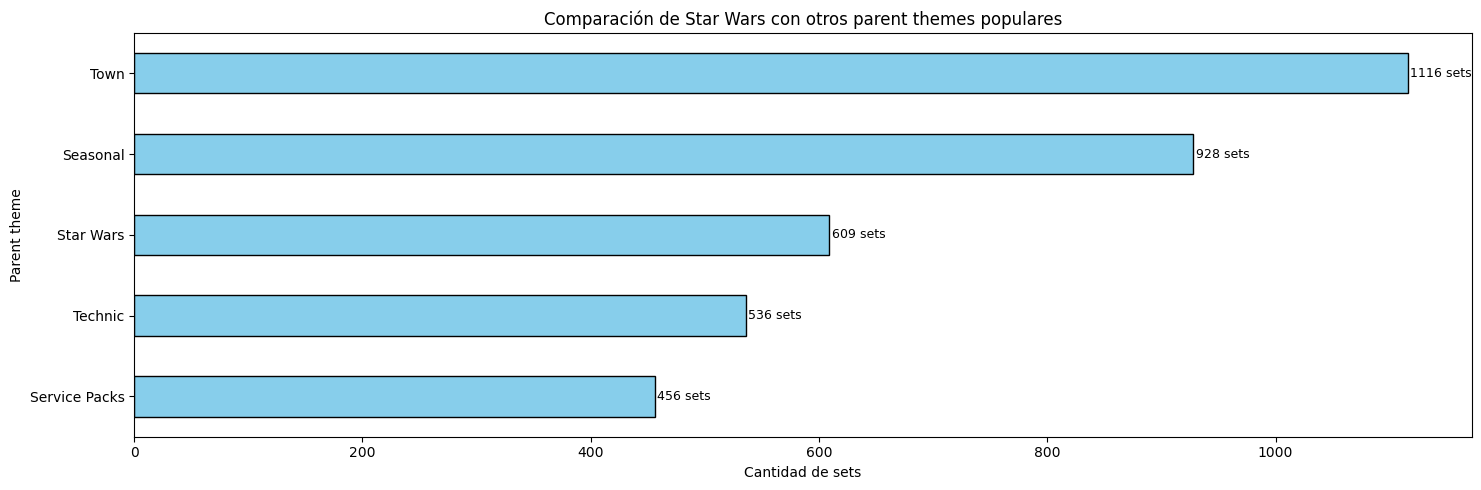

In [18]:
# Contar sets por parent_theme
sets_por_parent = lego_copia.groupby("parent_theme")["set_num"].count().sort_values(ascending=False)

# Seleccionar Top 5 parent themes
top5_parent = sets_por_parent.head(5)
# print(top5_parent)


plt.figure(figsize=(15,5))

ax = top5_parent.sort_values().plot(
    kind="barh", 
    color="skyblue", 
    edgecolor="black"
)

for i, valor in enumerate(top5_parent.sort_values()):
    ax.text(
        valor + 2,   # un poco a la derecha del final de la barra
        i,           # posición vertical de la barra
        str(valor) + " sets",  # el número como texto
        va='center',
        fontsize=9
    )


plt.title("Comparación de Star Wars con otros parent themes populares")
plt.xlabel("Cantidad de sets")
plt.ylabel("Parent theme")
plt.tight_layout()
plt.show()



Comparado con otras temáticas populares (Town, Technic, Seasonal), Star Wars se mantiene entre los más prolíficos.

# Licenciados vs no licenciados

## ¿Qué proporción de sets de LEGO son licenciados vs no licenciados?

📊 Proporción de sets licenciados vs no licenciados:
is_licensed
False    90.028731
True      9.971269
Name: proportion, dtype: float64


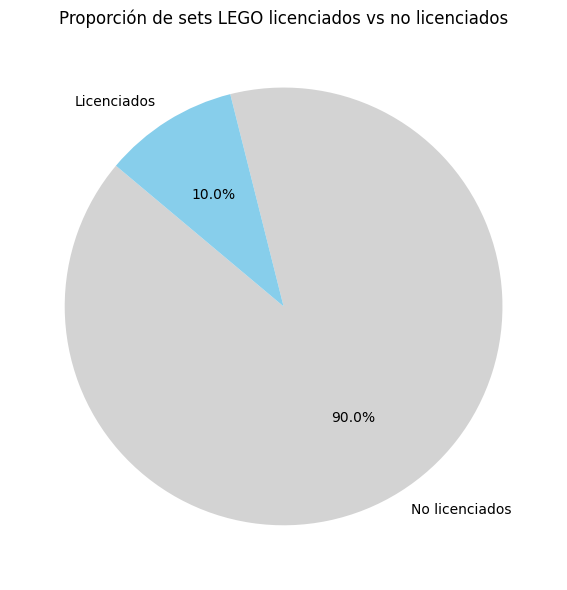

In [19]:


# JOIN: lego_sets.parent_theme ↔ parent_themes.name
lego_full = lego_copia.merge(
    themes_copia,
    left_on="parent_theme",
    right_on="name",
    how="left",
    suffixes=("", "_parent")
)


# Contar sets licenciados vs no licenciados
proporcion = lego_full['is_licensed'].value_counts(normalize=True) * 100

print("📊 Proporción de sets licenciados vs no licenciados:")
print(proporcion)



# Gráfico con ax
fig, ax = plt.subplots(figsize=(6,6))
ax.pie(
    proporcion,
    labels=['No licenciados','Licenciados'],
    autopct='%1.1f%%',
    startangle=140,
    colors=['lightgray','skyblue']
)
ax.set_title("Proporción de sets LEGO licenciados vs no licenciados")
plt.tight_layout()
plt.show()

Los sets licenciados representan el 11.1% del catálogo total.

## ¿Cómo ha evolucionado el lanzamiento de sets licenciados vs no licenciados a lo largo del tiempo?

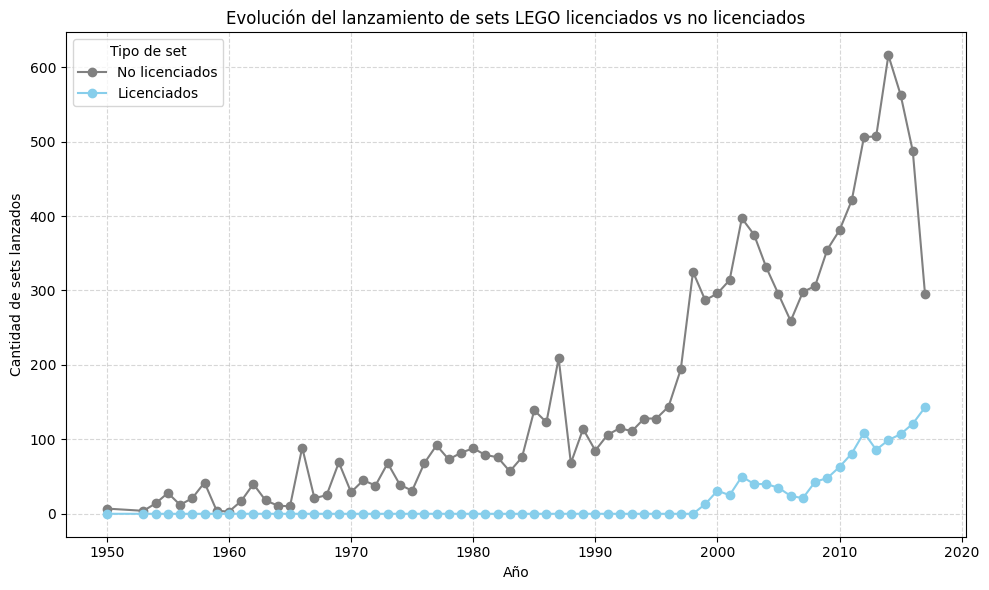

In [20]:
# Agrupar por año y licencia
evolucion = (
    lego_full.groupby(["year","is_licensed"])["set_num"]
    .count()
    .reset_index()
)

# Pivotear para tener columnas separadas
evolucion_pivot = evolucion.pivot(
    index="year", 
    columns="is_licensed", 
    values="set_num"
).fillna(0)

# Renombrar columnas para claridad
evolucion_pivot = evolucion_pivot.rename(
    columns={True:"Licenciados", False:"No licenciados"}
)

# Gráfico
fig, ax = plt.subplots(figsize=(10,6))
evolucion_pivot.plot(ax=ax, marker="o",  color=["gray","skyblue"])

ax.set_title("Evolución del lanzamiento de sets LEGO licenciados vs no licenciados")
ax.set_xlabel("Año")
ax.set_ylabel("Cantidad de sets lanzados")
ax.grid(True, linestyle="--", alpha=0.5)
ax.legend(title="Tipo de set")
plt.tight_layout()
plt.show()

Su lanzamiento se intensificó a partir de los años 2000.

## ¿Qué temáticas licenciadas tienen más sets?

📊 Temáticas licenciadas con más sets:
parent_theme
Star Wars                           609
Super Heroes                        242
Harry Potter                         67
The Hobbit and Lord of the Rings     40
Minecraft                            30
Name: set_num, dtype: int64


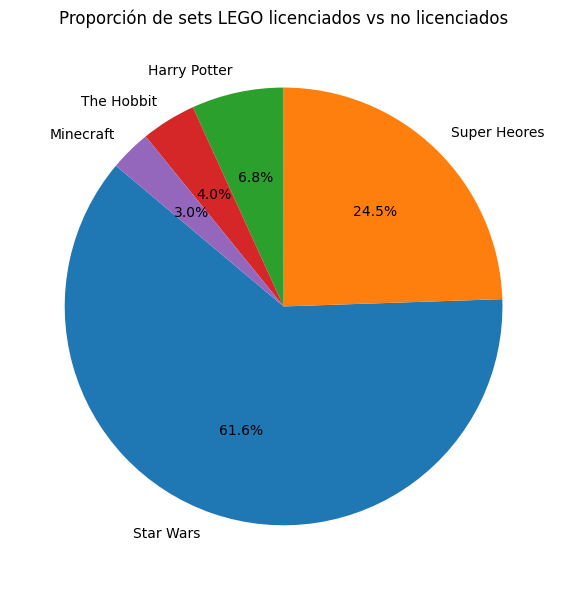

In [21]:
# Filtrar solo licenciados
licenciados = lego_full[lego_full["is_licensed"] == True]

# Contar sets por temática licenciada
sets_por_licenciado = (
    licenciados.groupby("parent_theme")["set_num"]
    .count()
    .sort_values(ascending=False)
)

# Vemos los primeros 5
print("📊 Temáticas licenciadas con más sets:")
print(sets_por_licenciado.head(5))


fig, ax = plt.subplots(figsize=(6,6))
ax.pie(
    sets_por_licenciado.head(5),
    labels= ['Star Wars ', 'Super Heores', 'Harry Potter', 'The Hobbit', 'Minecraft'],
    autopct='%1.1f%%',
    startangle=140,
    
)
ax.set_title("Proporción de sets LEGO licenciados vs no licenciados")
plt.tight_layout()
plt.show()

Entre los licenciados, destacan Star Wars, Harry Potter y Super Heroes como los de mayor volumen.